<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/QUANT003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
!pip install ta

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import ta

data = yf.download('TSLA', start='2020-01-01', end='2023-01-01')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [4]:
macd_object = ta.trend.MACD(data['Close'])
data['MACD'] = macd_object.macd()
data['MACD_Signal'] = macd_object.macd_signal()
data['MACD_Diff'] = macd_object.macd_diff()
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,MACD_Signal,MACD_Diff
Date,,,,,,,,,
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,-17.244768,-13.664886,-3.579883
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,-19.072995,-14.746507,-4.326487
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,-20.000032,-15.797212,-4.202820
2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,-19.771700,-16.592110,-3.179590
2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157777300,-19.258998,-17.125488,-2.133511


In [5]:
macd_object = ta.trend.MACD(data['Close'])
data['MACD'] = macd_object.macd()
data['MACD_Signal'] = macd_object.macd_signal()
data['MACD_Diff'] = macd_object.macd_diff()
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,MACD_Signal,MACD_Diff
Date,,,,,,,,,
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,-17.244768,-13.664886,-3.579883
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,-19.072995,-14.746507,-4.326487
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,-20.000032,-15.797212,-4.202820
2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,-19.771700,-16.592110,-3.179590
2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157777300,-19.258998,-17.125488,-2.133511


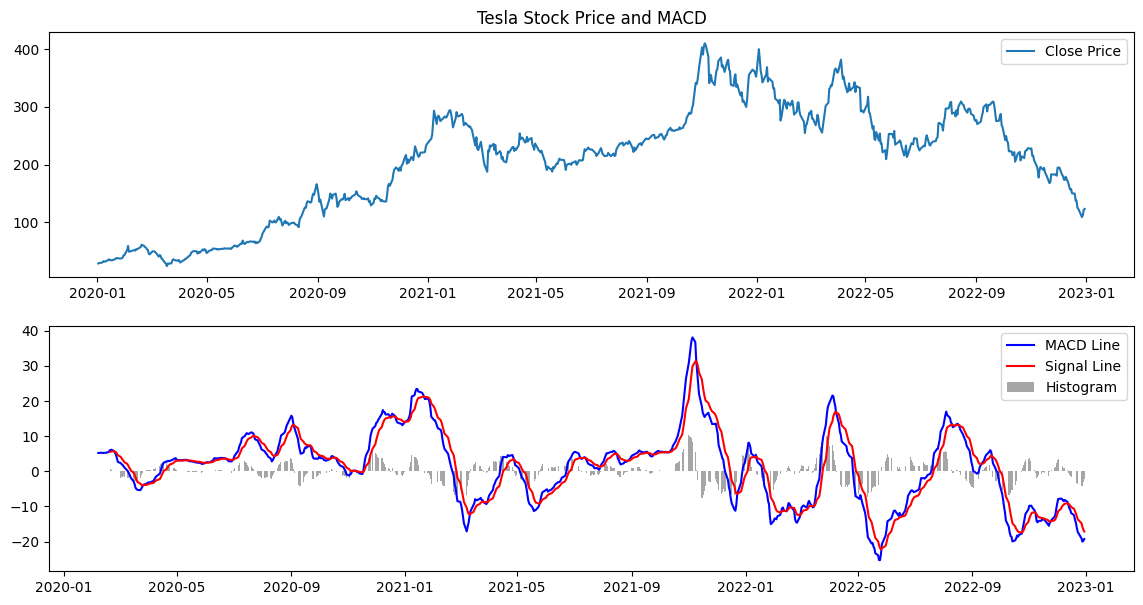

In [6]:
# Plotting
plt.figure(figsize=(14, 7))

# Plotting Close Price
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Close Price')
plt.title('Tesla Stock Price and MACD')
plt.legend()

# Plotting MACD
plt.subplot(2, 1, 2)
plt.plot(data['MACD'], label='MACD Line', color='blue')
plt.plot(data['MACD_Signal'], label='Signal Line', color='red')
plt.bar(data.index, data['MACD_Diff'], label='Histogram', color='grey', alpha=0.7)
plt.legend()

plt.show()

In [7]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def get_stock_data(symbol, start_date, end_date):
    try:
        data = yf.download(symbol, start=start_date, end=end_date)
        return data
    except:
        print("Invalid input! Please enter a valid stock symbol, start date, and end date.")
        return None

In [9]:
def calculate_macd(data):
    short_ema = data['Close'].ewm(span=12, adjust=False).mean()
    long_ema = data['Close'].ewm(span=26, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=9, adjust=False).mean()
    return macd, signal

In [10]:
def generate_signals(data):
    macd, signal = calculate_macd(data)
    signals = np.where(macd > signal, 1, -1)
    signals = np.where(macd.isnull(), 0, signals)
    return signals


def simulate_trades(data, signals, initial_money):
    num_shares = 0
    cash_balance = initial_money
    dates_bought = []
    dates_sold = []
    for i in range(len(data)):
        if signals[i] == 1 and cash_balance > 0:
            num_shares = cash_balance / data['Close'][i]
            cash_balance = 0
            dates_bought.append(data.index[i])
            print(f"Buy {num_shares:.2f} shares at {data['Close'][i]:.2f}, balance: ${cash_balance:.2f}")
        elif signals[i] == -1 and num_shares > 0:
            sell_price = data['Close'][i]
            cash_balance = num_shares * sell_price
            num_shares = 0
            dates_sold.append(data.index[i])
            print(f"Sell {num_shares:.2f} shares at {data['Close'][i]:.2f}, balance: ${cash_balance:.2f}")
    return cash_balance if num_shares == 0 else num_shares * data['Close'][-1], dates_bought, dates_sold

In [11]:
def plot_data(data, signals, symbol, start_date, end_date, dates_bought, dates_sold):
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.plot(data['Close'], label='Price')
    ax.scatter(dates_bought, data.loc[dates_bought]['Close'], marker='^', color='green', label='Buy')
    ax.scatter(dates_sold, data.loc[dates_sold]['Close'], marker='v', color='red', label='Sell')
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title(f"{symbol} Stock Price ({start_date} to {end_date})")
    plt.savefig("plot.png")


def main():
    symbol = input("Enter the stock ticker symbol: ")
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")
    initial_money = float(input("Enter the initial amount of money: "))

    data = get_stock_data(symbol, start_date, end_date)
    if data is None:
        return

    signals = generate_signals(data)
    final_balance, dates_bought, dates_sold = simulate_trades(data, signals, initial_money)

    print(f"Final balance: ${final_balance:.2f}")
    print(f"Profit/Loss: ${final_balance - initial_money:.2f}")

    plot_data(data, signals, symbol, start_date, end_date, dates_bought, dates_sold)

Enter the stock ticker symbol: TSLA
Enter the start date (YYYY-MM-DD): 2023-01-01
Enter the end date (YYYY-MM-DD): 2024-01-01
Enter the initial amount of money: 88888


[*********************100%%**********************]  1 of 1 completed


Buy 782.19 shares at 113.64, balance: $0.00
Sell 0.00 shares at 197.37, balance: $154380.71
Buy 804.86 shares at 191.81, balance: $0.00
Sell 0.00 shares at 189.19, balance: $152271.98
Buy 785.39 shares at 193.88, balance: $0.00
Sell 0.00 shares at 185.52, balance: $145706.09
Buy 856.79 shares at 170.06, balance: $0.00
Sell 0.00 shares at 241.05, balance: $206529.78
Buy 731.13 shares at 282.48, balance: $0.00
Sell 0.00 shares at 276.54, balance: $202186.86
Buy 847.42 shares at 238.59, balance: $0.00
Sell 0.00 shares at 244.88, balance: $207517.17
Buy 797.99 shares at 260.05, balance: $0.00
Sell 0.00 shares at 253.92, balance: $202625.50
Buy 924.09 shares at 219.27, balance: $0.00
Sell 0.00 shares at 239.29, balance: $221125.80
Buy 880.80 shares at 251.05, balance: $0.00
Sell 0.00 shares at 248.48, balance: $218862.12
Final balance: $218862.12
Profit/Loss: $129974.12


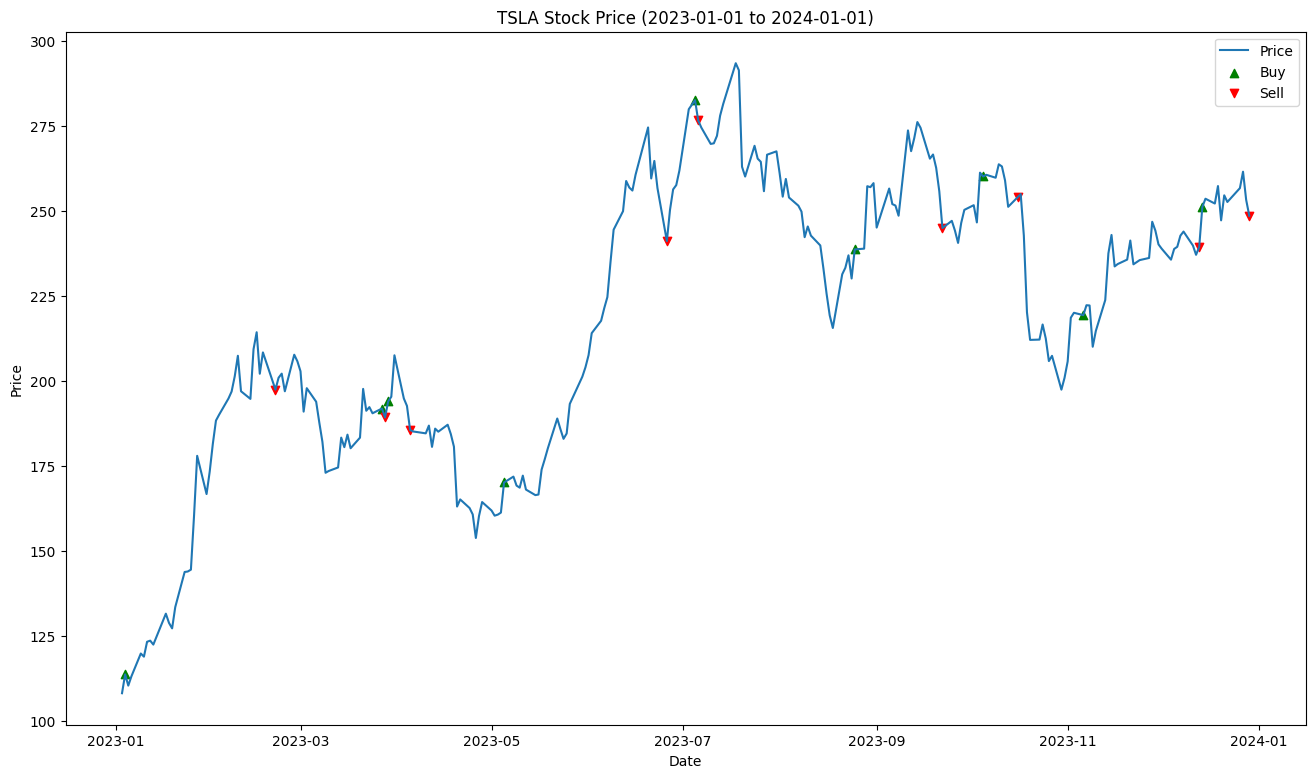

In [12]:
if __name__ == '__main__':
    main()

In [13]:
import csv

def simulate_trades(data, signals, initial_money, symbol):
    num_shares = 0
    cash_balance = initial_money
    dates_bought = []
    dates_sold = []
    for i in range(len(data)):
        if signals[i] == 1 and cash_balance > 0:
            num_shares = cash_balance / data['Close'][i]
            cash_balance = 0
            dates_bought.append(data.index[i])
            print(f"Buy {num_shares:.2f} shares at {data['Close'][i]:.2f}, balance: ${cash_balance:.2f}")
        elif signals[i] == -1 and num_shares > 0:
            sell_price = data['Close'][i]
            cash_balance = num_shares * sell_price
            num_shares = 0
            dates_sold.append(data.index[i])
            print(f"Sell {num_shares:.2f} shares at {data['Close'][i]:.2f}, balance: ${cash_balance:.2f}")
    final_balance = cash_balance if num_shares == 0 else num_shares * data['Close'][-1]
    profit_loss = final_balance - initial_money
    with open('data.csv', mode='a') as file:
        writer = csv.writer(file)
        writer.writerow([symbol, f"${profit_loss:.2f}"])
    return final_balance, dates_bought, dates_sold

Enter the stock ticker symbol: TSLA
Enter the start date (YYYY-MM-DD): 2023-07-01
Enter the end date (YYYY-MM-DD): 2024-02-01
Enter the initial amount of money: 88888


[*********************100%%**********************]  1 of 1 completed


Buy 314.67 shares at 282.48, balance: $0.00
Sell 0.00 shares at 276.54, balance: $87018.86
Buy 299.67 shares at 290.38, balance: $0.00
Sell 0.00 shares at 260.02, balance: $77920.80
Buy 338.73 shares at 230.04, balance: $0.00
Sell 0.00 shares at 244.88, balance: $82947.52
Buy 318.97 shares at 260.05, balance: $0.00
Sell 0.00 shares at 253.92, balance: $80992.25
Buy 369.37 shares at 219.27, balance: $0.00
Sell 0.00 shares at 239.29, balance: $88387.08
Buy 352.07 shares at 251.05, balance: $0.00
Sell 0.00 shares at 248.48, balance: $87482.26
Final balance: $87482.26
Profit/Loss: $-1405.74


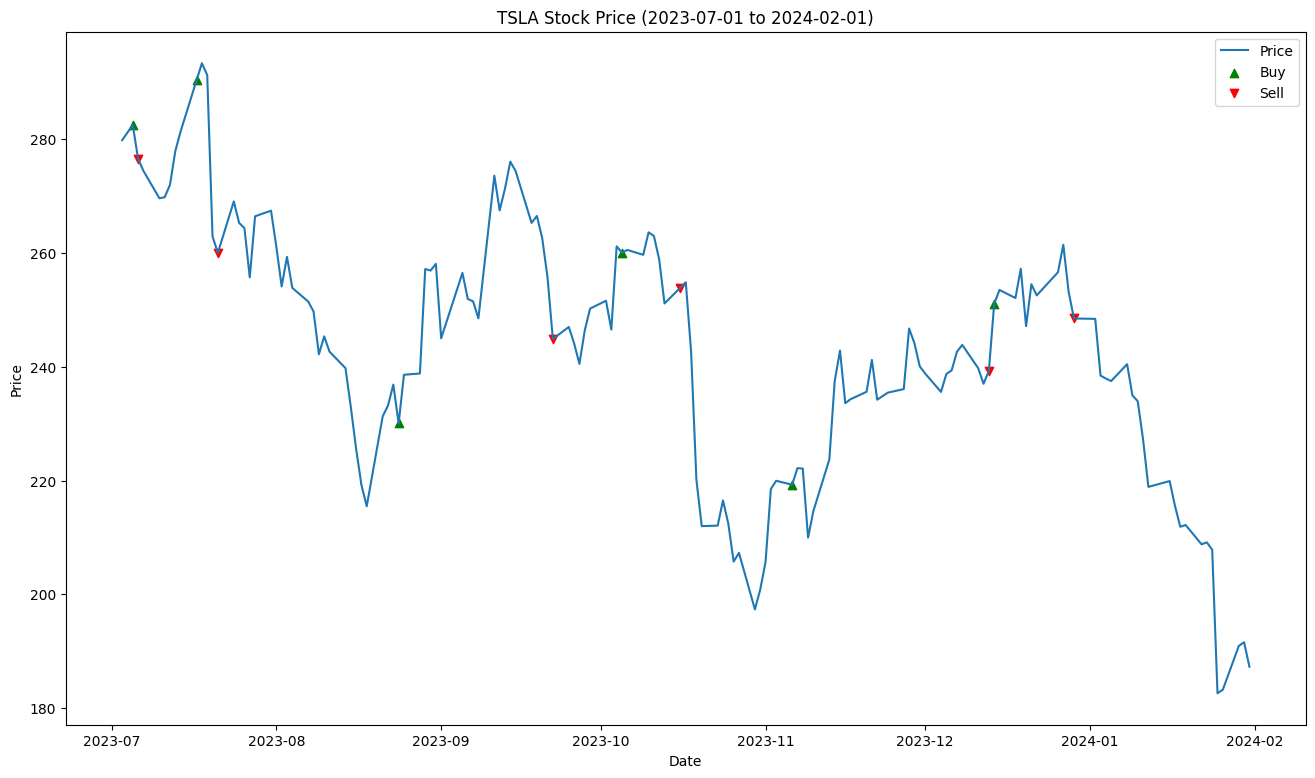

In [14]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import csv

def get_stock_data(symbol, start_date, end_date):
    try:
        data = yf.download(symbol, start=start_date, end=end_date)
        return data
    except:
        print("Invalid input! Please enter a valid stock symbol, start date, and end date.")
        return None


def calculate_macd(data):
    short_ema = data['Close'].ewm(span=12, adjust=False).mean()
    long_ema = data['Close'].ewm(span=26, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=9, adjust=False).mean()
    return macd, signal

def generate_signals(data):
    macd, signal = calculate_macd(data)
    signals = np.where(macd > signal, 1, -1)
    signals = np.where(macd.isnull(), 0, signals)
    return signals

def simulate_trades(data, signals, initial_money, symbol):
    num_shares = 0
    cash_balance = initial_money
    dates_bought = []
    dates_sold = []
    for i in range(len(data)):
        if signals[i] == 1 and cash_balance > 0:
            num_shares = cash_balance / data['Close'][i]
            cash_balance = 0
            dates_bought.append(data.index[i])
            print(f"Buy {num_shares:.2f} shares at {data['Close'][i]:.2f}, balance: ${cash_balance:.2f}")
        elif signals[i] == -1 and num_shares > 0:
            sell_price = data['Close'][i]
            cash_balance = num_shares * sell_price
            num_shares = 0
            dates_sold.append(data.index[i])
            print(f"Sell {num_shares:.2f} shares at {data['Close'][i]:.2f}, balance: ${cash_balance:.2f}")
    final_balance = cash_balance if num_shares == 0 else num_shares * data['Close'][-1]
    profit_loss = final_balance - initial_money
    with open('data.csv', mode='a') as file:
        writer = csv.writer(file)
        writer.writerow([symbol, f"${profit_loss:.2f}"])
    return final_balance, dates_bought, dates_sold


def plot_data(data, signals, symbol, start_date, end_date, dates_bought, dates_sold):
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.plot(data['Close'], label='Price')
    ax.scatter(dates_bought, data.loc[dates_bought]['Close'], marker='^', color='green', label='Buy')
    ax.scatter(dates_sold, data.loc[dates_sold]['Close'], marker='v', color='red', label='Sell')
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title(f"{symbol} Stock Price ({start_date} to {end_date})")
    plt.savefig("plot.png")


def main():
    symbol = input("Enter the stock ticker symbol: ")
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")
    initial_money = float(input("Enter the initial amount of money: "))

    data = get_stock_data(symbol, start_date, end_date)
    if data is None:
        return

    signals = generate_signals(data)
    final_balance, dates_bought, dates_sold = simulate_trades(data, signals, initial_money, symbol)

    print(f"Final balance: ${final_balance:.2f}")
    print(f"Profit/Loss: ${final_balance - initial_money:.2f}")

    plot_data(data, signals, symbol, start_date, end_date, dates_bought, dates_sold)


if __name__ == '__main__':
    main()

强弱分水在零轴 好股都在水上漂

水下金叉是反弹 还没利润就玩完

水下死叉创新低 快速下跌去赶底

水上死叉顶背离 下跌绵绵无绝期

水上金叉主升浪 迭创新高粮满仓